# Convolução e Filtragem de Imagens no OpenCV

Bibliografia: 

[Cap.5 - Computer Vision. Shapiro](https://courses.cs.washington.edu/courses/cse576/book/ch5.pdf)

[Cap.3 - Digital Image Processing. Gonzales / Woods](http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/Digital_Image_Processing_2ndEd.pdf)

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import auxiliar as aux
print ("OpenCV Version : %s " % cv2.__version__)

img = cv2.imread("hall_box_battery1.jpg",cv2.IMREAD_GRAYSCALE )
img = cv2.resize(img, (768, 384), 0,0) # Resize da imagem para 50% do tamanho original

OpenCV Version : 4.5.3 


# Filtragem linear

O filtro linear é uma operação mais geral em processamento de imagem que pode ser utilizada para vários efeitos, incluindo suavização, detecção de borda, afiação e muitos outros. 

Para aplicar um filtro linear, você utiliza um kernel (uma pequena matriz, como um filtro 3x3 ou 5x5) e **"deslizá-lo"** sobre a imagem para produzir uma nova imagem. Essa operação é chamada de **convolução** e está exemplificada no gif abaixo:

![convolução](img/convolucao.gif)

A função `cv2.filter2D` da biblioteca OpenCV é geralmente usada para aplicar filtros lineares. Você pode especificar o kernel que deseja usar como argumento.

Agora vamos apresentar alguns filtros lineares comumente usados ​​e como eles funcionam.

Também podem ver mais alguns exemplos de filtros lineares [aqui](https://setosa.io/ev/image-kernels/).

## Filtro de Blur (ou da média) 

O filtro de blur é um filtro de suavização que substitui o valor de um pixel pela média dos valores dos pixels vizinhos.

Por exemplo, um kernel de tamanho 3x3 é definido como:
$$
\begin{pmatrix} -1 & -1 & -1 \\
-1 & 9 & -1 \\
-1 & -1 & -1 
\end{pmatrix}
$$

A função `cv2.blur` aplica este kernel à imagem para calcular a média dos pixels vizinhos para cada pixel, o que resulta em um efeito de suavização. Você pode especificar o tamanho do kernel como um argumento ao chamar a função. Por exemplo, em Python:

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


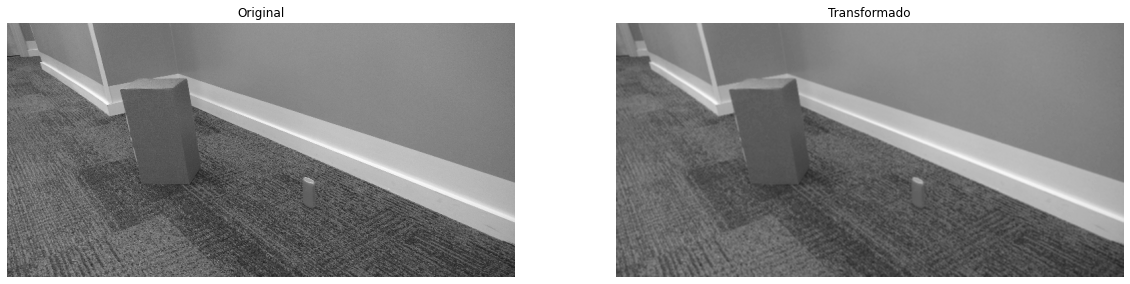

In [2]:
kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
    ])
kernel = 1 / 9 * kernel

print(kernel)
aux.plot_filter(img.copy(),kernel)

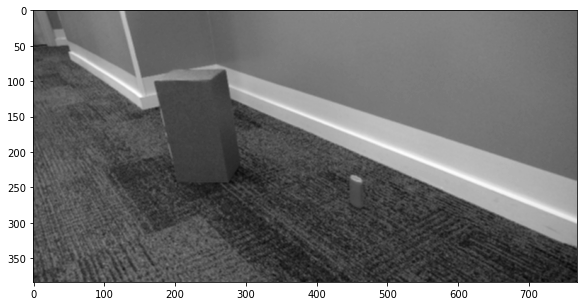

In [3]:
blur = cv2.blur(img, (3,3))
plt.figure(figsize=(10,5))
plt.imshow(blur, cmap="gray")
plt.show()

<div id="borda"></div>

## Filtragem de bordas (Kernel Prewitt)

O Kernel Prewitt é um operador de detecção de bordas usado no processamento de imagens e visão computacional. Ele é um filtro linear discreto, usado para calcular uma aproximação do gradiente da função de intensidade da imagem. 

Desta forma, o operador Prewitt enfatiza mudanças na intensidade na direção horizontal e outro para detectar mudanças na direção vertical.

**Kernel Prewitt para a direção horizontal (Prewitt-x)**
$$
\begin{pmatrix} -1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{pmatrix}
$$

**Kernel Prewitt para a direção vertical (Prewitt-y)**
$$
\begin{pmatrix} -1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{pmatrix}
$$

**Kernel Prewitt para a direção diagonal (Prewitt-xy)**
$$
\begin{pmatrix} 0 & 1 & 1 \\
-1 & 0 & 1 \\
-1 & -1 & 0
\end{pmatrix}
$$

Repare que o kernel Prewitt tem o mesmo efeito que o exercício 5 da APS 1.

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


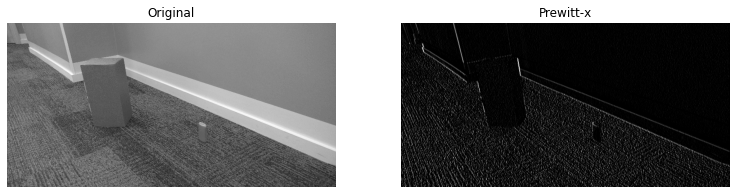

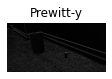

In [4]:
kernel_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
    ])

kernel_y = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
    ])

print(kernel)
aux.plot_filter_3(img.copy(),kernel_x,kernel_y,'Prewitt-x','Prewitt-y')

## Filtro de Sobel

$\frac{\partial I}{\partial x} \approx I * \begin{pmatrix} -1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1 
\end{pmatrix} \;\;\;\;\;\;\;$
$\frac{\partial I}{\partial x} \approx I * \begin{pmatrix} -1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1 
\end{pmatrix}$

$|\overrightarrow{\rm \nabla I}| = \sqrt{ \frac{\partial I}{\partial x}^2 + \frac{\partial I}{\partial x}^2} \;\;\;\;\;\;\;$
$\angle \nabla I = atan \left( \frac {\frac{\partial I}{\partial y}} {\frac{\partial I}{\partial x}}\right)$



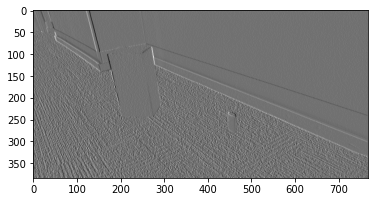

In [5]:
%matplotlib inline
Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0)
plt.imshow(Ix, cmap='gray')
plt.show()

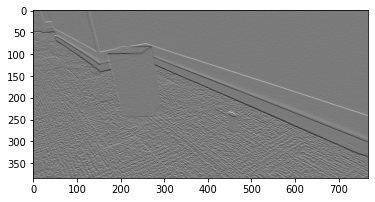

In [6]:
Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1)
plt.imshow(Iy, cmap='gray')
plt.show()

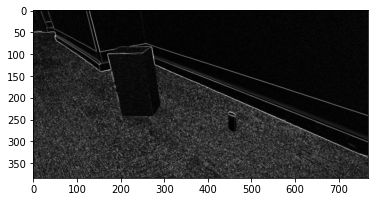

In [7]:
grad = (Ix**2 + Iy**2)**0.5
plt.imshow(grad, cmap='gray')
plt.show()

## Filtro de Bordas

In [8]:
plt.figure(figsize=(10,5))
plt.imshow(small, cmap="gray", vmin=0, vmax=255)
plt.show()

NameError: name 'small' is not defined

<Figure size 720x360 with 0 Axes>

<div id="canny"></div>

## Detector de linhas de Canny

O detector de linhas de *Canny* combina algumas operações lineares de forma mais sofisticada.
Além disso, os contornos sofrem um processo de emagrecimento

In [ ]:
min_contrast = 100
max_contrast = 200
linhas = cv2.Canny(small, min_contrast, max_contrast )

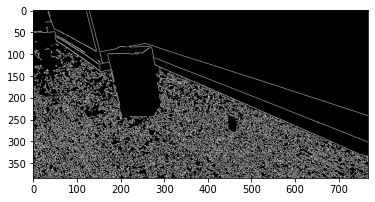

In [ ]:
plt.imshow(linhas, cmap="gray")
plt.show()

In [ ]:
# Função que calcula os parâmetros da função de Canny automaticamente
linhas = aux.auto_canny(small)

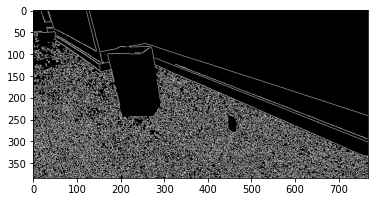

In [ ]:
plt.imshow(linhas, cmap="gray")
plt.show()

In [ ]:
def canny(minimo, maximo):
    img = cv2.Canny(small, minimo, maximo)
    plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
w = interactive(canny, minimo=80, maximo=85)
w

interactive(children=(IntSlider(value=80, description='minimo', max=240, min=-80), IntSlider(value=85, descrip…